In [2]:
import wradlib as wrl
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

bin_file_name_prefix = "raa01-yw2017.002_10000-"
img_file_name_prefix = "scaled_"

# Subdirectories with years
image_dir="/data/Radarbilder_DWD/minutely/"
data_dir="/data_hdd/Radardaten/minutely/uncompressed/"

year=2016
month=8
day_begin=10
day_end=17

In [3]:
def get_filename_prefix(year, month, day):
    date_string_w_full_year = "{:4d}{:02d}{:02d}".format(year, month, day)
    return date_string_w_full_year[2:]

In [4]:
def read_data_from_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file(radfile)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    return data

In [23]:
def read_image_gray(image_file):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [26]:
def get_all_binary_data_in_range(year, month, day_begin, day_end):
    os.environ["WRADLIB_DATA"] = data_dir + str(year) + "/"
    os.chdir(data_dir + str(year) + "/")
    bin_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = bin_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            try:
                if len(bin_data)==0:
                    bin_data=read_data_from_radolan(file)
                else:
                    data = read_data_from_radolan(file)
                    np.concatenate((bin_data, data))
            except OSError as e:
                print("Could not read file: " + str(e))
    return bin_data

def get_all_image_data_in_range(year, month, day_begin, day_end):
    os.chdir(image_dir + str(year) + "/")
    img_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = img_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            # Read image, append to data
            if len(img_data) == 0:
                img_data = read_image_gray(file)
            else:
                image = read_image_gray(file)
                np.concatenate((img_data, image))
    return img_data

In [27]:
bin_data = get_all_binary_data_in_range(year, month, day_begin, day_end)
print(type(bin_data))
print(len(bin_data))
print("{} / {}".format(bin_data.min(), bin_data.max()))

img_data = get_all_image_data_in_range(year, month, day_begin, day_end)
print(type(img_data))
print(len(img_data))
print("{} / {}".format(img_data.min(), img_data.max()))

<class 'numpy.ma.core.MaskedArray'>
1100
0.0 / 4.66
<class 'numpy.ndarray'>
1100
0 / 220


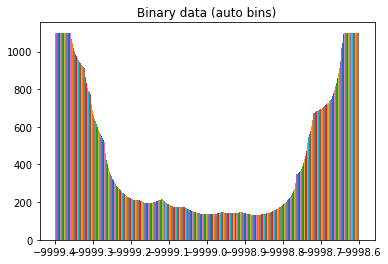

In [28]:
#hist, bin_edges = np.histogram(bin_data, density=True)
plt.hist(bin_data, bins='auto')  # arguments are passed to np.histogram
plt.title("Binary data (auto bins)")
plt.show()

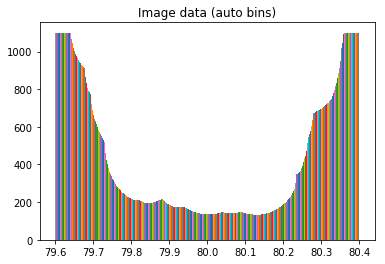

In [29]:
plt.hist(img_data, bins='auto')  # arguments are passed to np.histogram
plt.title("Image data (auto bins)")
plt.show()